# Pet Finder - Adopción de Mascotas

PetFinder.es una plataforma de adopción de Mascotas de Malasia, con una base de datos de más de 150.000 animales. 

Las tasas de adopción de animales están fuertemente correlacionadas con los metadatos asociados con sus perfiles en línea, como el texto descriptivo y las características de las fotografías. Como ejemplo, PetFinder está experimentando actualmente con una herramienta de inteligencia artificial simple llamada Cuteness Meter, que clasifica qué tan linda es una mascota en función de las cualidades presentes en sus fotos.

En esta competencia, desarrollará algoritmos para predecir la adoptabilidad de las mascotas, específicamente, ¿qué tan rápido se adopta una mascota?

Web Organización: https://www.petfinder.my/

Datos: https://www.kaggle.com/c/petfinder-adoption-prediction



## Script Inicial - Análisis Exploratorio

En este trabajo se busca predecir la velocidad a la que se adopta una mascota, según la lista de la mascota en PetFinder. 

A veces, un perfil representa a un grupo de mascotas. En este caso, la velocidad de adopción está determinada por la velocidad a la que se adoptan todas las mascotas. 

Los datos incluyen datos de **Texto Libre**, **Datos Tabulares** e **Emágenes**, lo que lo hace un dataset sumamente rico para explorar

### Ejemplos de Scripts de EDA (Exploratory Data Analysis)

* En R: https://www.kaggle.com/jaseziv83/an-extensive-eda-of-petfinder-my-data
* En Python: https://www.kaggle.com/artgor/exploration-of-data-step-by-step

File descriptions:

* train.csv - Tabular/text data for the training set
* test.csv - Tabular/text data for the test set
* sample_submission.csv - A sample submission file in the correct format
* breed_labels.csv - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.
* color_labels.csv - Contains ColorName for each ColorID
* state_labels.csv - Contains StateName for each StateID

In [5]:
# Importación de Librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud
import os

%matplotlib inline
pd.set_option('display.max_columns', 30)
plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [6]:
# Datos Tabulares
#Defino al directorio donde está este script como BASE DIR<
BASE_DIR = './'

#Datos de entrenamiento 
PATH_TO_TRAIN = os.path.join(BASE_DIR, "input/petfinder-adoption-prediction/train/train.csv")

train = pd.read_csv(PATH_TO_TRAIN)

In [7]:
train.shape

(14993, 24)

In [8]:
train.head() 

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


### Data Fields

* PetID - Unique hash ID of pet profile
* AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
* Type - Type of animal (1 = Dog, 2 = Cat)
* Name - Name of pet (Empty if not named)
* Age - Age of pet when listed, in months
* Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
* Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
* Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
* Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
* Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
* Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
* MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
* FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
* Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
* Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
* Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
* Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
* Quantity - Number of pets represented in profile
* Fee - Adoption fee (0 = Free)
* State - State location in Malaysia (Refer to StateLabels dictionary)
* RescuerID - Unique hash ID of rescuer
* VideoAmt - Total uploaded videos for this pet
* PhotoAmt - Total uploaded photos for this pet
* Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

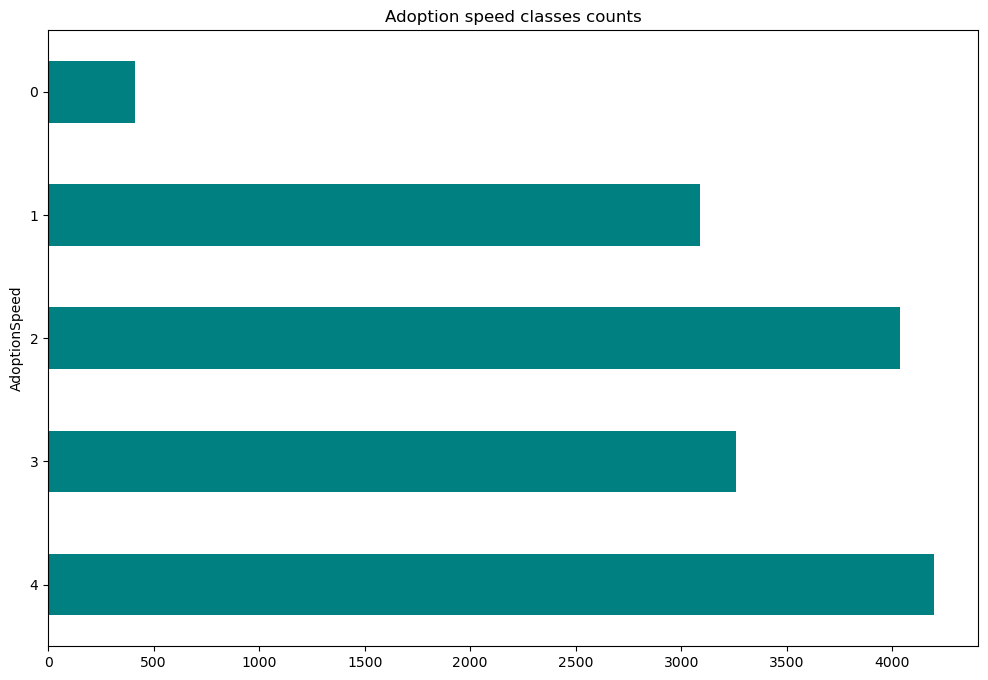

In [10]:
train['AdoptionSpeed'].value_counts().sort_index(ascending = False).plot(kind='barh', color='teal');
plt.title('Adoption speed classes counts');

### Target: AdoptionSpeed

The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:

* 0 - Pet was adopted on the same day as it was listed.
* 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
* 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
* 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
* 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

In [11]:
# Mapeamos el Tipo de Mascota
train['Type'] = train['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')

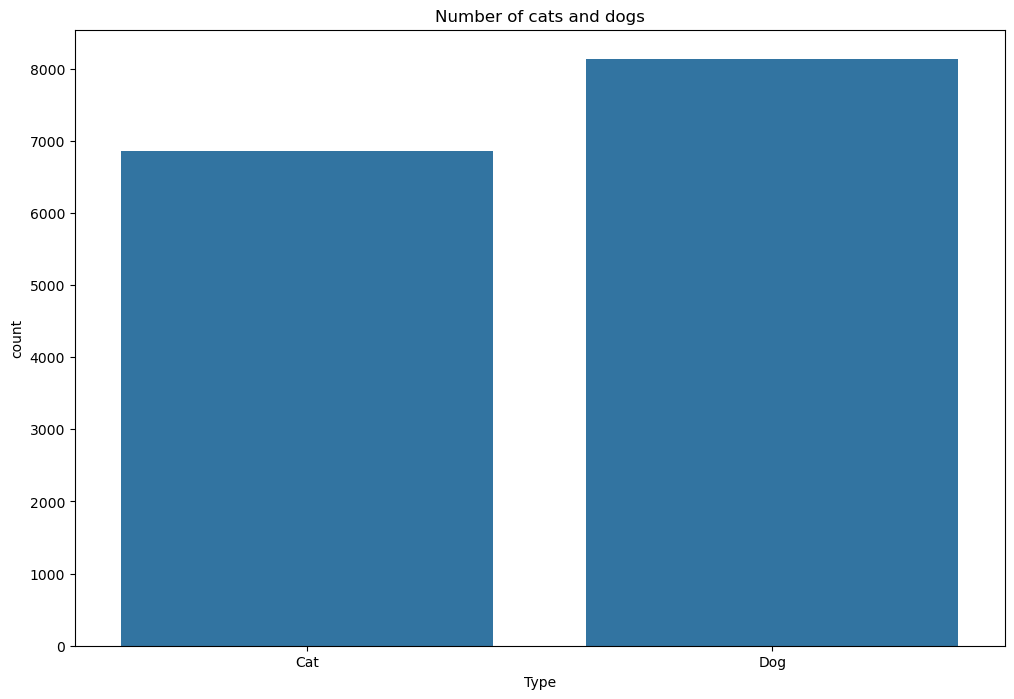

In [13]:
sns.countplot(x='Type', data=train);
plt.title('Number of cats and dogs');

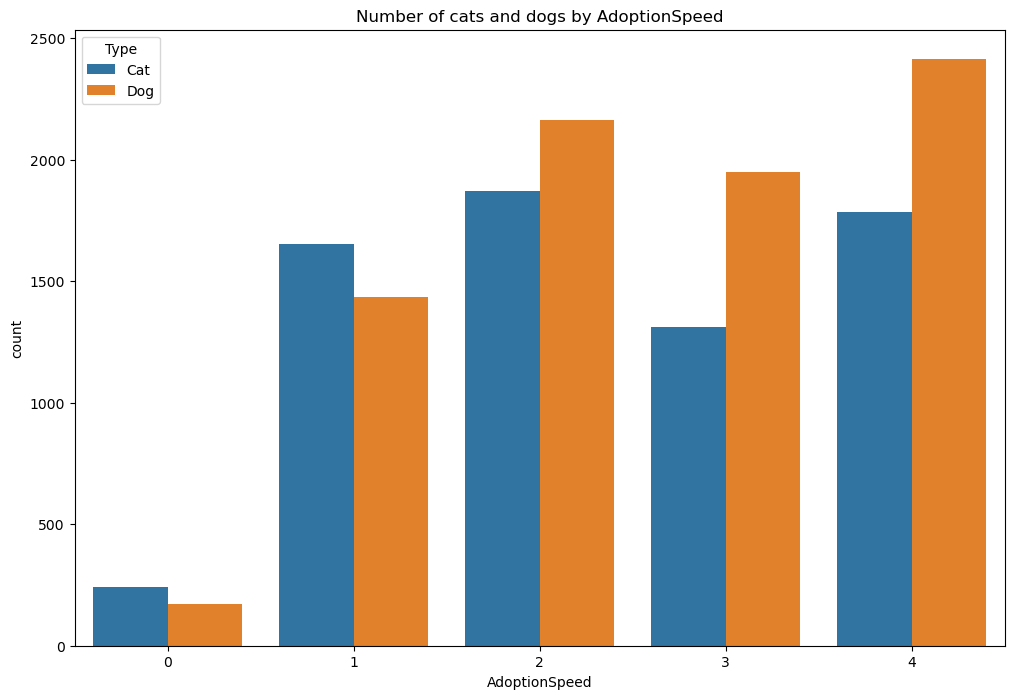

In [14]:
sns.countplot(x='AdoptionSpeed', data=train, hue='Type');
plt.title('Number of cats and dogs by AdoptionSpeed');

In [15]:
train.Name.value_counts()

Name
Baby               66
Lucky              64
No Name            54
Brownie            54
Mimi               52
                   ..
Boceyyy             1
Panbe               1
Doremon             1
Sentul Kittiens     1
Nibble              1
Name: count, Length: 9059, dtype: int64

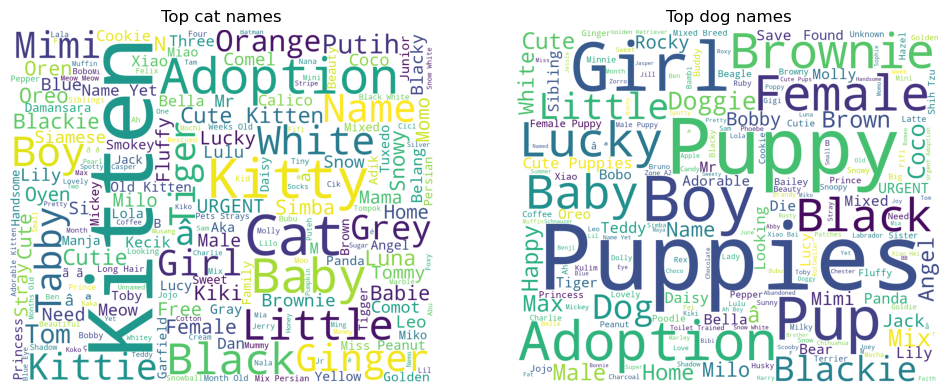

In [16]:
plt.subplot(1, 2, 1)
text_cat = ' '.join(train.loc[train['Type'] == 'Cat', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(train.loc[train['Type'] == 'Dog', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

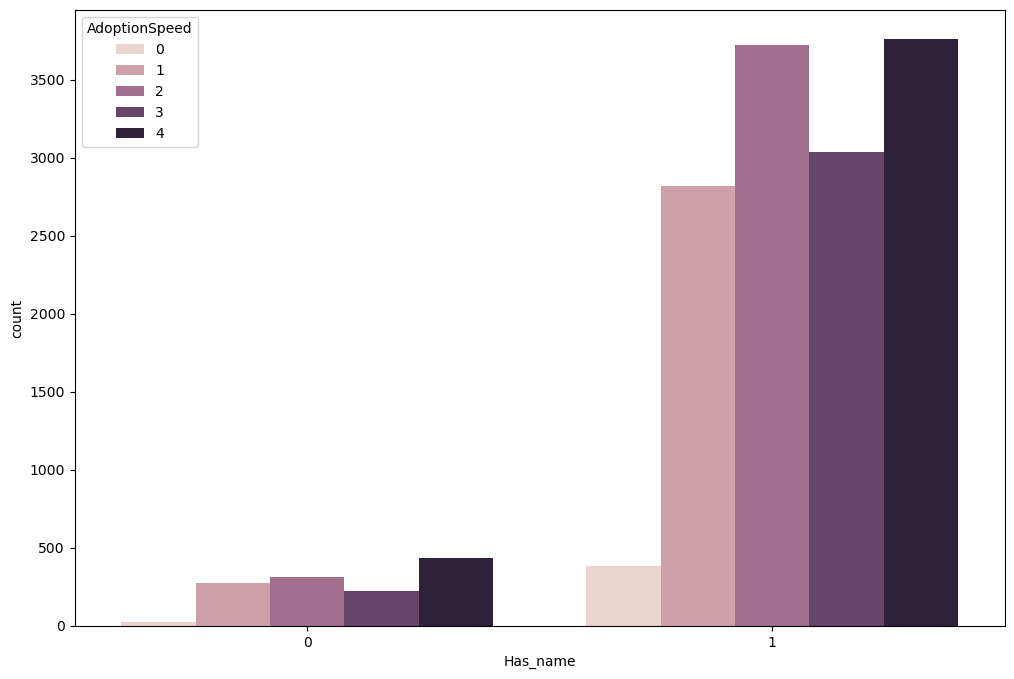

In [17]:
train['Name'] = train['Name'].fillna('Unnamed')
train['Has_name'] = 1
train.loc[train['Name'] == 'Unnamed', 'Has_name'] = 0

sns.countplot(x='Has_name', data=train, hue='AdoptionSpeed');

Text(0.5, 1.0, 'Distribution of pets age in Months')

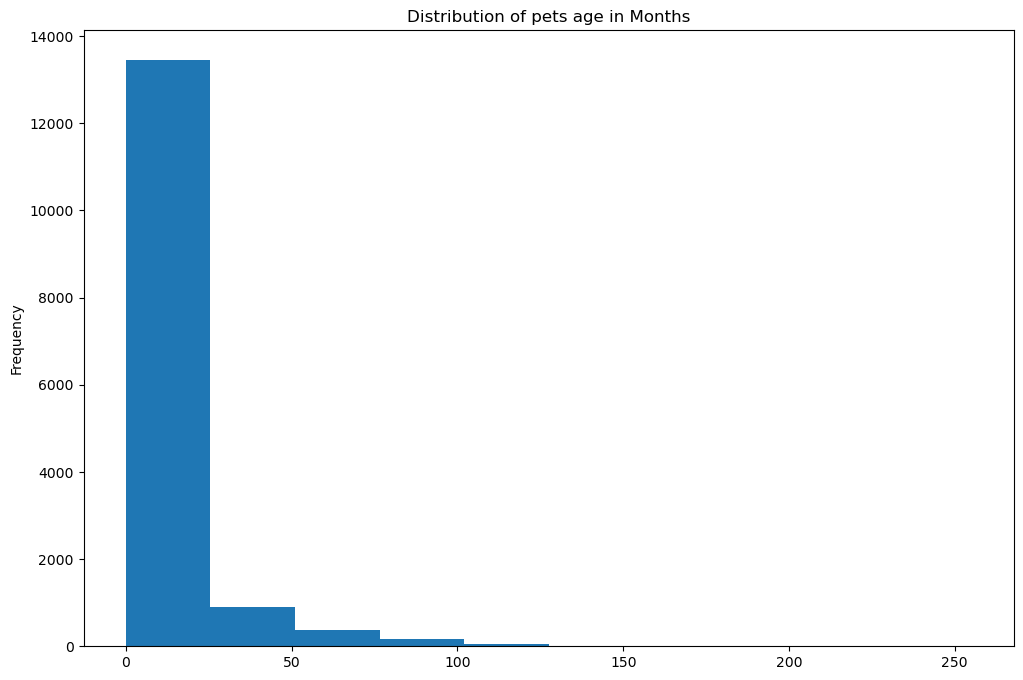

In [18]:
train['Age'].plot(kind='hist')
plt.title('Distribution of pets age in Months')

## Tareas a Realizar

#### Pre-procesamiento:

* Chequear Nulos y Decidir si Imputar o Descartar
* Chequear Variables Categóricas y convertirlas en Numéricas
* Estandarizar o Normalizar

#### Ideas para EDA:

* Analizar la Raza de las Mascotas
* Analizar el Género
* Analizar los 3 Colores Informados para cada Mascota
* Estudiar las variables de Salud: Vacunación, Esterilización, Desparacitación
* Entender el impacto del Fee cobrado
* Estudiar las Regiones Geográficas disponibles
* Analizar el impacto de tener Fotos y/o Videos

Todos estos análisis pueden hacerse en función de la Especie (Gato/Perro) y respecto al Target



In [21]:
# Contar ceros por columna
num_ceros_por_columna = np.sum(train == 0, axis=0)

print(num_ceros_por_columna)

Type                 0
Name                 0
Age                179
Breed1               5
Breed2           10762
Gender               0
Color1               0
Color2            4471
Color3           10604
MaturitySize         0
FurLength            0
Vaccinated           0
Dewormed             0
Sterilized           0
Health               0
Quantity             0
Fee              12663
State                0
RescuerID            0
VideoAmt         14419
Description          0
PetID                0
PhotoAmt           341
AdoptionSpeed      410
Has_name          1270
dtype: int64


### Existen datos faltantes en:

 * En caso de las variables color 2 y color 3 son los casos en que la mascota tiene un único color o dos colores.
 * En el caso de la variable Breed2 se presentan cuando la mascota tiene una única raza. 
 * En el caso de la variable Breed1, que solo existen 5 nulos, se supone que son mascotas sin una raza definida.
 * En el caso de la variable Age, se supone que son mascotas con menos de 30 días.

En el caso de las variables de color y de breed habría que asignar un NA en vez de un 0, para no considerar que puede ser una catagoría posible.

In [23]:
# Datos Tabulares de color, state, breed
Color = pd.read_csv(os.path.join(BASE_DIR, "input/petfinder-adoption-prediction/ColorLabels.csv"))
State = pd.read_csv(os.path.join(BASE_DIR, "input/petfinder-adoption-prediction/StateLabels.csv"))
Breed = pd.read_csv(os.path.join(BASE_DIR, "input/petfinder-adoption-prediction/BreedLabels.csv"))


In [24]:
Color.head() 

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [25]:
# Vuelvo a recuperar el dataset original
train = train

# genero un diccionario
color_mapping = dict(zip(Color['ColorID'], Color['ColorName']))

# Reemplazar los valores numéricos con las etiquetas en las columnas Color1, Color2, y Color3 
# y tambien soluciona el problema de los nulos 
train['Color1'] = train['Color1'].map(color_mapping)
train['Color2'] = train['Color2'].map(color_mapping)
train['Color3'] = train['Color3'].map(color_mapping)

# genero un diccionario
state_mapping = dict(zip(State['StateID'], State['StateName']))

# Reemplazar los valores numéricos con las etiquetas en las columnas estado
# y tambien soluciona el problema de los nulos 
train['State'] = train['State'].map(state_mapping)

# genero un diccionario
breed_mapping = dict(zip(Breed['BreedID'], Breed['BreedName']))

# Reemplazar los valores numéricos con las etiquetas en las columnas Breed1(Perro) y Breed2(Gato) 
# y tambien soluciona el problema de los nulos 
train['Breed1'] = train['Breed1'].map(breed_mapping)
train['Breed2'] = train['Breed2'].map(breed_mapping)


In [26]:
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Has_name
0,Cat,Nibble,3,Tabby,NaN,1,Black,White,NaN,1,1,2,2,2,1,1,100,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1
1,Cat,No Name Yet,1,Domestic Medium Hair,NaN,1,Black,Brown,NaN,2,2,3,3,3,1,1,0,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,1
2,Dog,Brisco,1,Mixed Breed,NaN,1,Brown,White,NaN,2,2,1,1,2,1,1,0,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,1
3,Dog,Miko,4,Mixed Breed,NaN,2,Black,Brown,NaN,2,1,1,1,2,1,1,150,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,1
4,Dog,Hunter,1,Mixed Breed,NaN,1,Black,NaN,NaN,2,1,2,2,2,1,1,0,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,1


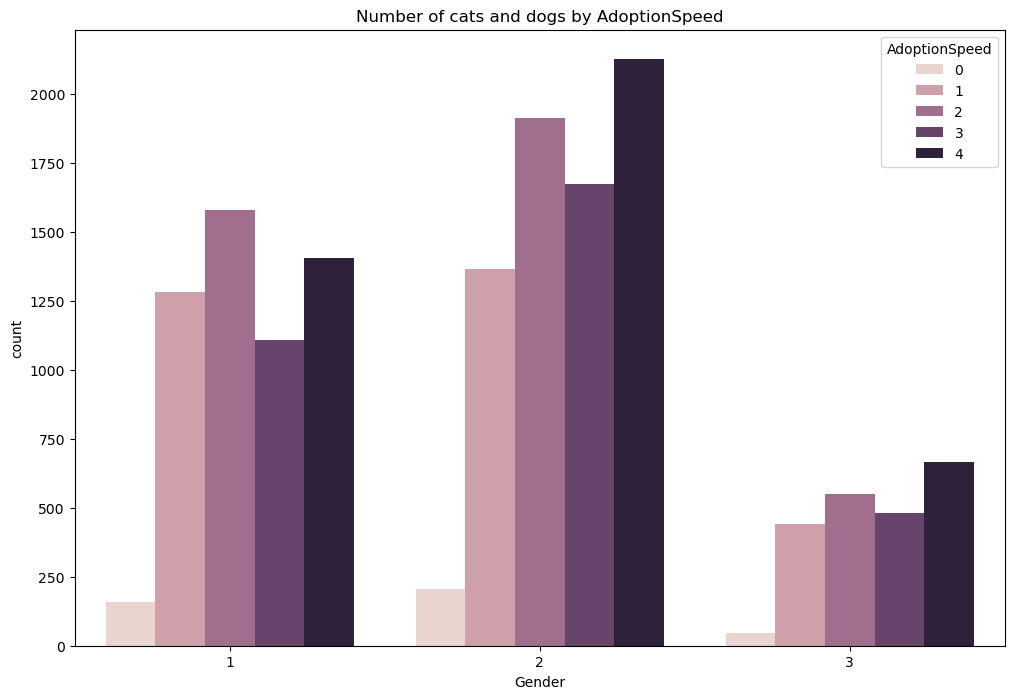

In [27]:
sns.countplot(x='Gender', data=train, hue='AdoptionSpeed');
plt.title('Number of cats and dogs by AdoptionSpeed');

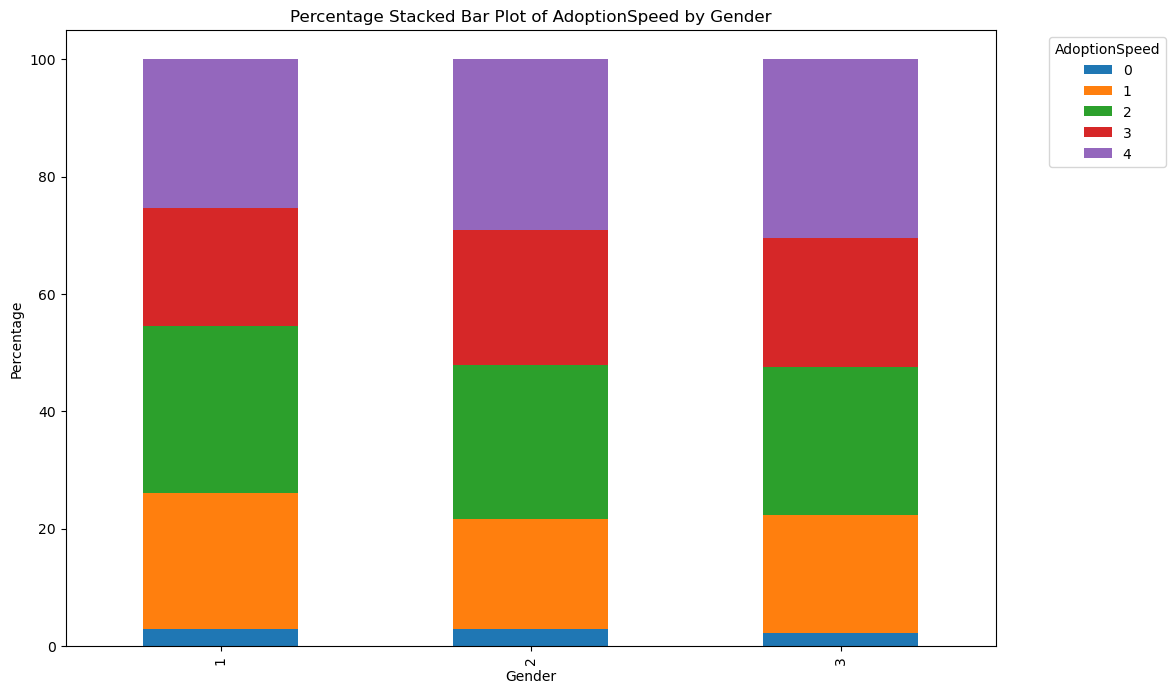

In [28]:
# Crear una tabla de conteos
count_data = train.groupby(['Gender', 'AdoptionSpeed']).size().reset_index(name='count')

# Calcular los porcentajes
total_count = count_data.groupby('Gender')['count'].transform('sum')
count_data['percentage'] = count_data['count'] / total_count * 100

# Pivotar los datos para el gráfico apilado
pivot_data = count_data.pivot(index='Gender', columns='AdoptionSpeed', values='percentage')

# Crear el gráfico apilado
pivot_data.plot(kind='bar', stacked=True)

# Agregar etiquetas y título
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Plot of AdoptionSpeed by Gender')
plt.legend(title='AdoptionSpeed', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

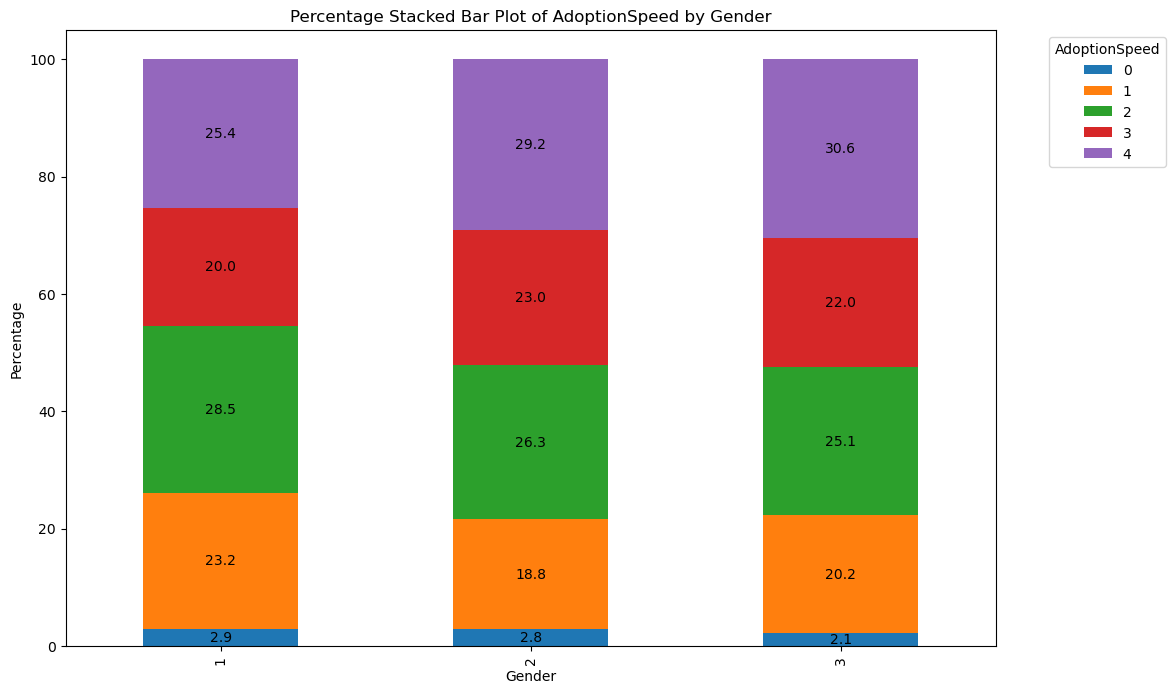

In [29]:
# Crear una tabla de conteos
count_data = train.groupby(['Gender', 'AdoptionSpeed']).size().reset_index(name='count')

# Calcular los porcentajes
total_count = count_data.groupby('Gender')['count'].transform('sum')
count_data['percentage'] = count_data['count'] / total_count * 100

# Pivotar los datos para el gráfico apilado
pivot_data = count_data.pivot(index='Gender', columns='AdoptionSpeed', values='percentage')

# Crear el gráfico apilado
ax = pivot_data.plot(kind='bar', stacked=True)

# Agregar etiquetas y título
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Plot of AdoptionSpeed by Gender')
plt.legend(title='AdoptionSpeed', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar los porcentajes dentro de las barras
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f')

plt.show()


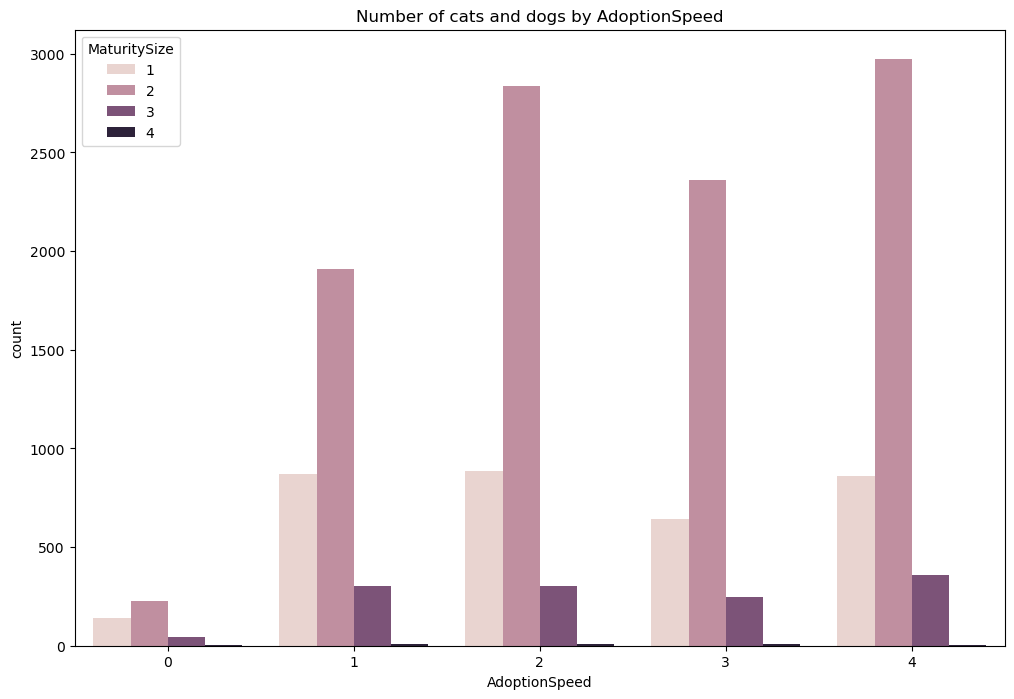

In [30]:
sns.countplot(x='AdoptionSpeed', data=train, hue='MaturitySize');
plt.title('Number of cats and dogs by AdoptionSpeed');

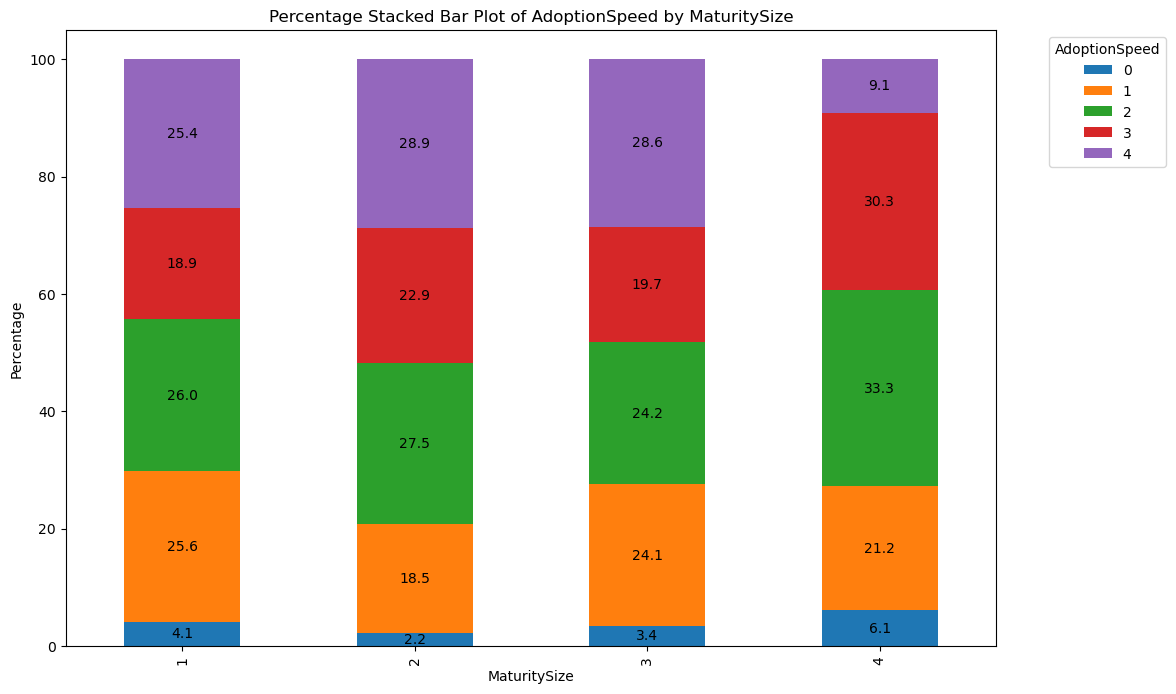

In [31]:
# Crear una tabla de conteos
count_data = train.groupby(['MaturitySize', 'AdoptionSpeed']).size().reset_index(name='count')

# Calcular los porcentajes
total_count = count_data.groupby('MaturitySize')['count'].transform('sum')
count_data['percentage'] = count_data['count'] / total_count * 100

# Pivotar los datos para el gráfico apilado
pivot_data = count_data.pivot(index='MaturitySize', columns='AdoptionSpeed', values='percentage')

# Crear el gráfico apilado
ax = pivot_data.plot(kind='bar', stacked=True)

# Agregar etiquetas y título
plt.xlabel('MaturitySize')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Plot of AdoptionSpeed by MaturitySize')
plt.legend(title='AdoptionSpeed', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar los porcentajes dentro de las barras
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f')

plt.show()

In [32]:
# Agregar la columna 'Pura' basada en las condiciones especificadas
train['Pura'] = np.where((train['Breed1'].notna()) & (train['Breed2'].isna()), 'Pure', 'Mixed')

In [33]:
# Agregar la columna 'mixed' basada en las condiciones especificadas
train['Pura'] = np.where(
  (train['Breed1'].notna()) & (train['Breed2'].notna()), 'Pure', np.where(
    train['Breed1'] != 'Mixed Breed', 'Pure', 'Mixed'
   )
  )

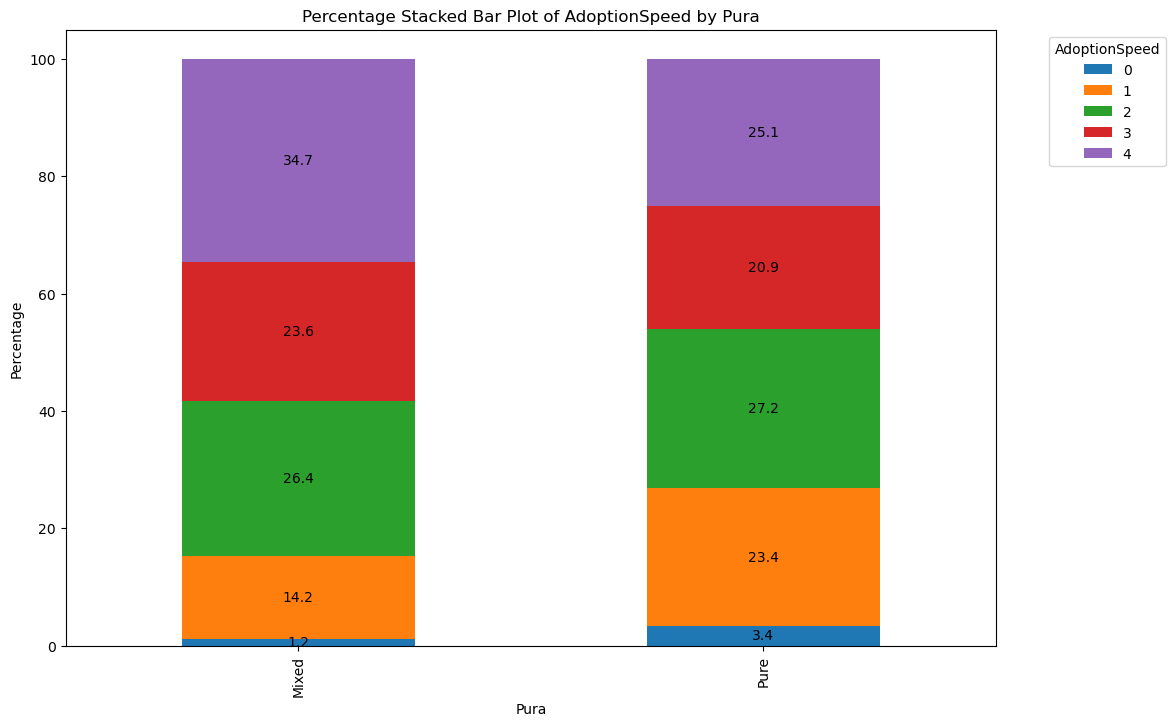

In [34]:
# Crear una tabla de conteos
count_data = train.groupby(['Pura', 'AdoptionSpeed']).size().reset_index(name='count')

# Calcular los porcentajes
total_count = count_data.groupby('Pura')['count'].transform('sum')
count_data['percentage'] = count_data['count'] / total_count * 100

# Pivotar los datos para el gráfico apilado
pivot_data = count_data.pivot(index='Pura', columns='AdoptionSpeed', values='percentage')

# Crear el gráfico apilado
ax = pivot_data.plot(kind='bar', stacked=True)

# Agregar etiquetas y título
plt.xlabel('Pura')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Plot of AdoptionSpeed by Pura')
plt.legend(title='AdoptionSpeed', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar los porcentajes dentro de las barras
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f')

plt.show()

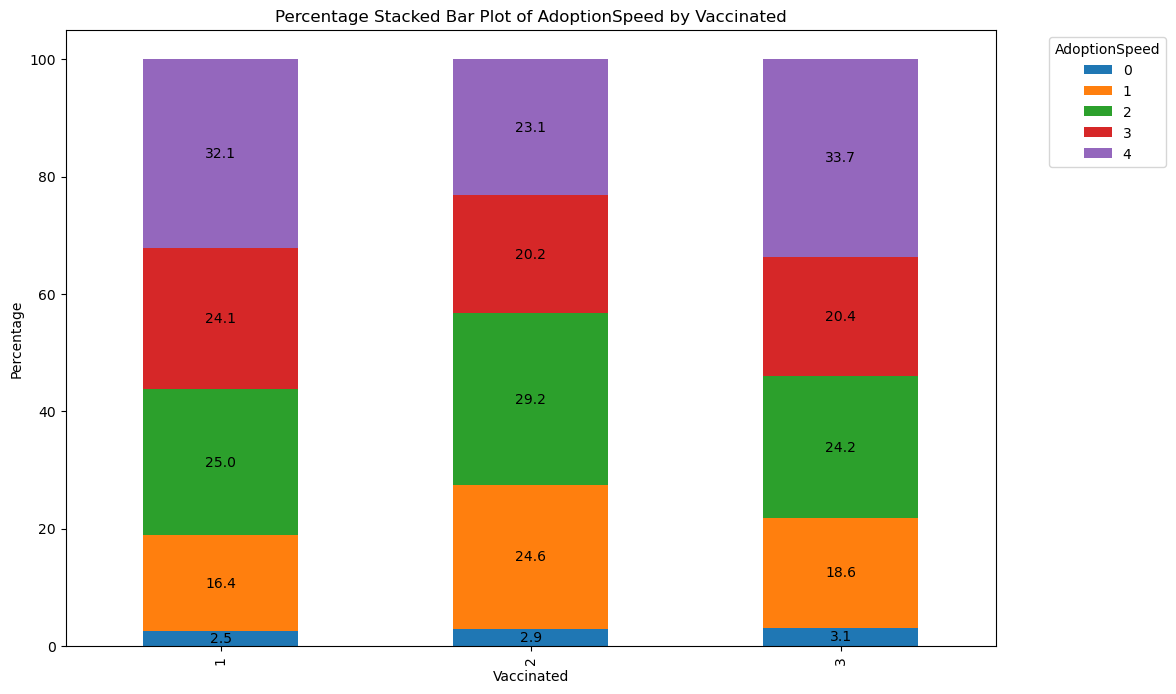

In [35]:
# Crear una tabla de conteos
count_data = train.groupby(['Vaccinated', 'AdoptionSpeed']).size().reset_index(name='count')

# Calcular los porcentajes
total_count = count_data.groupby('Vaccinated')['count'].transform('sum')
count_data['percentage'] = count_data['count'] / total_count * 100

# Pivotar los datos para el gráfico apilado
pivot_data = count_data.pivot(index='Vaccinated', columns='AdoptionSpeed', values='percentage')

# Crear el gráfico apilado
ax = pivot_data.plot(kind='bar', stacked=True)

# Agregar etiquetas y título
plt.xlabel('Vaccinated')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Plot of AdoptionSpeed by Vaccinated')
plt.legend(title='AdoptionSpeed', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar los porcentajes dentro de las barras
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f')

plt.show()


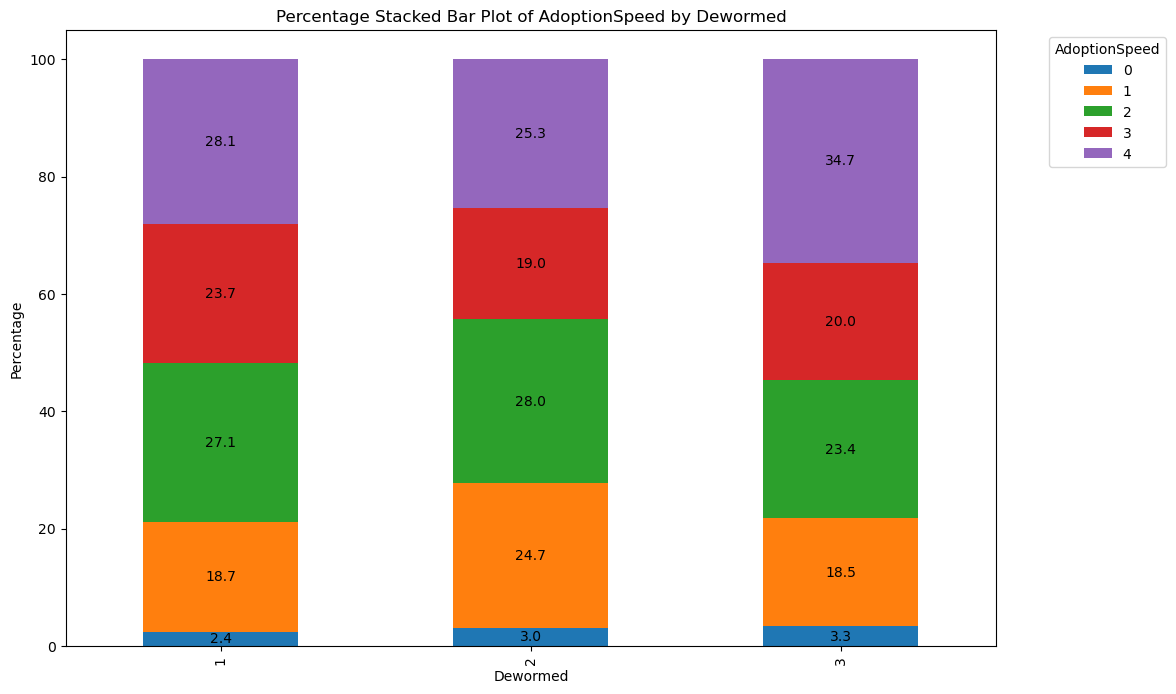

In [36]:
# Crear una tabla de conteos
count_data = train.groupby(['Dewormed', 'AdoptionSpeed']).size().reset_index(name='count')

# Calcular los porcentajes
total_count = count_data.groupby('Dewormed')['count'].transform('sum')
count_data['percentage'] = count_data['count'] / total_count * 100

# Pivotar los datos para el gráfico apilado
pivot_data = count_data.pivot(index='Dewormed', columns='AdoptionSpeed', values='percentage')

# Crear el gráfico apilado
ax = pivot_data.plot(kind='bar', stacked=True)

# Agregar etiquetas y título
plt.xlabel('Dewormed')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Plot of AdoptionSpeed by Dewormed')
plt.legend(title='AdoptionSpeed', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar los porcentajes dentro de las barras
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f')

plt.show()


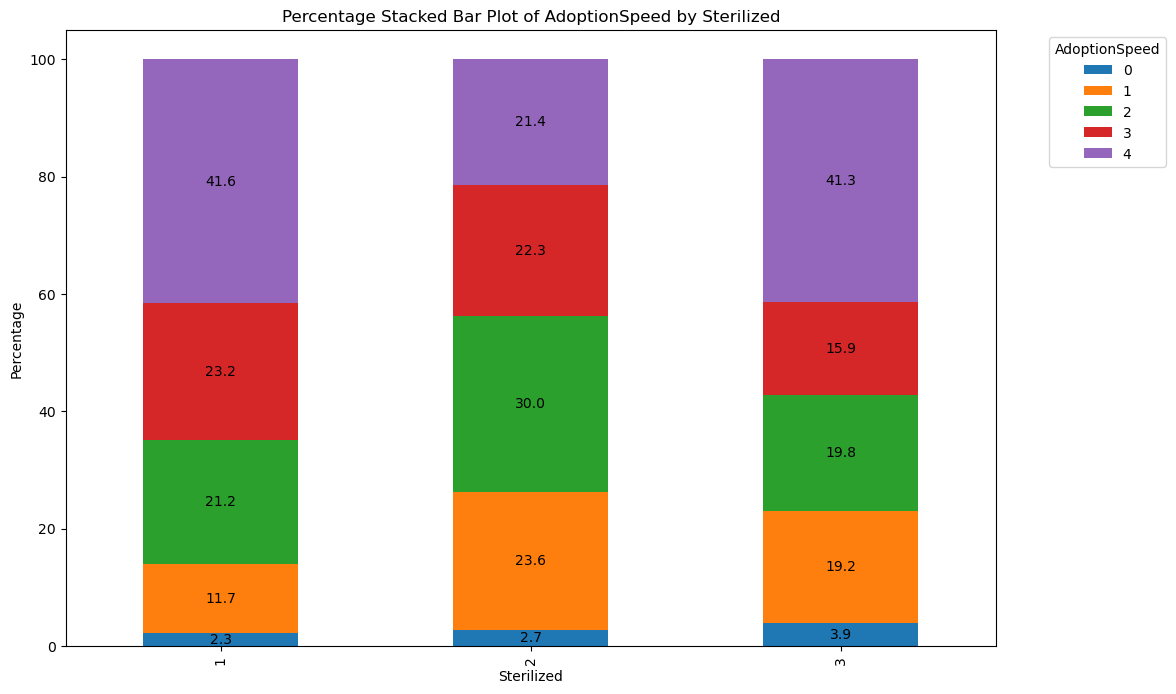

In [37]:
# Crear una tabla de conteos
count_data = train.groupby(['Sterilized', 'AdoptionSpeed']).size().reset_index(name='count')

# Calcular los porcentajes
total_count = count_data.groupby('Sterilized')['count'].transform('sum')
count_data['percentage'] = count_data['count'] / total_count * 100

# Pivotar los datos para el gráfico apilado
pivot_data = count_data.pivot(index='Sterilized', columns='AdoptionSpeed', values='percentage')

# Crear el gráfico apilado
ax = pivot_data.plot(kind='bar', stacked=True)

# Agregar etiquetas y título
plt.xlabel('Sterilized')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Plot of AdoptionSpeed by Sterilized')
plt.legend(title='AdoptionSpeed', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar los porcentajes dentro de las barras
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f')

plt.show()

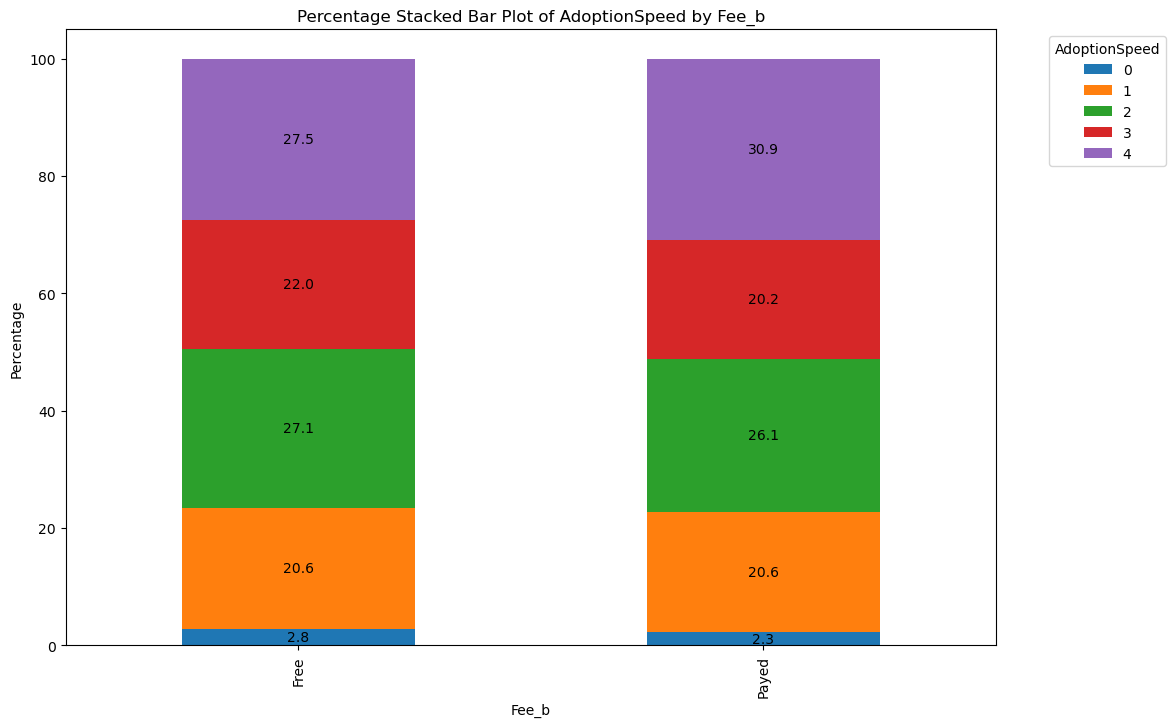

In [38]:
# Llevar a categoricas si pago o no pago
train['Fee_b'] = train['Fee'].apply(lambda x: 'Free' if x == 0 else 'Payed')

# Crear una tabla de conteos
count_data = train.groupby(['Fee_b', 'AdoptionSpeed']).size().reset_index(name='count')

# Calcular los porcentajes
total_count = count_data.groupby('Fee_b')['count'].transform('sum')
count_data['percentage'] = count_data['count'] / total_count * 100

# Pivotar los datos para el gráfico apilado
pivot_data = count_data.pivot(index='Fee_b', columns='AdoptionSpeed', values='percentage')

# Crear el gráfico apilado
ax = pivot_data.plot(kind='bar', stacked=True)

# Agregar etiquetas y título
plt.xlabel('Fee_b')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Plot of AdoptionSpeed by Fee_b')
plt.legend(title='AdoptionSpeed', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar los porcentajes dentro de las barras
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f')

plt.show()

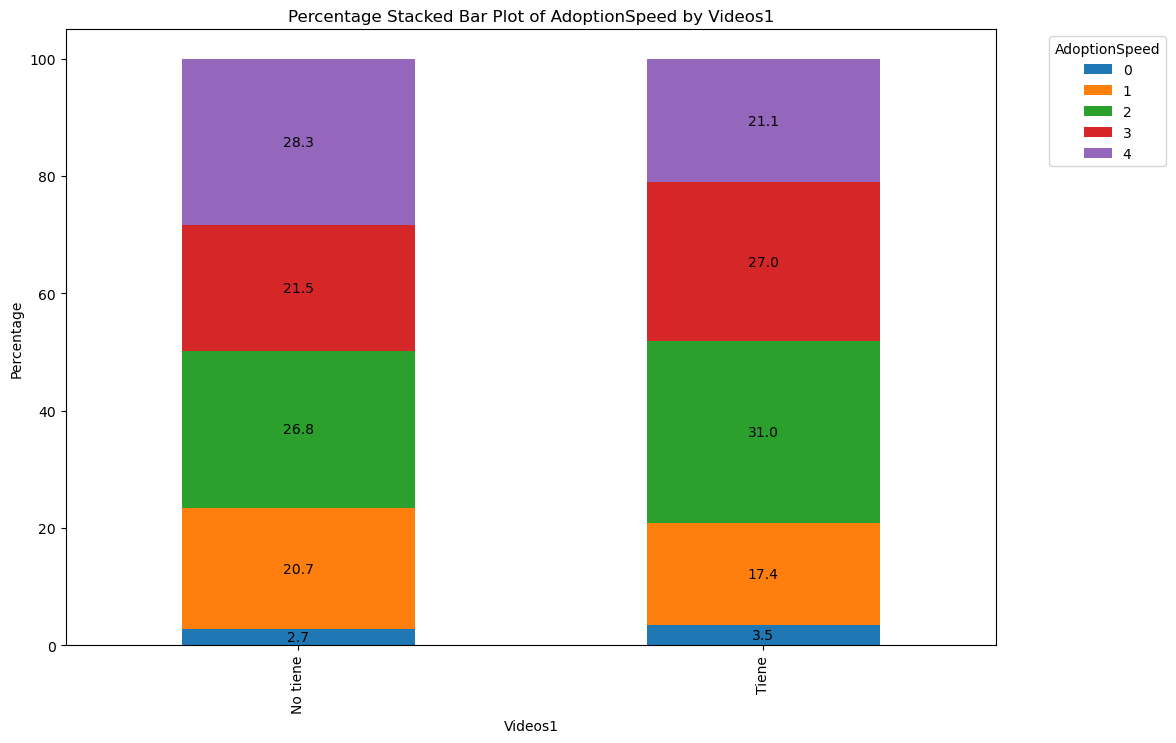

In [39]:
# LLevar a categoricas si pago o no pago
train['Videos1'] = train['VideoAmt'].apply(lambda x: 'No tiene' if x == 0 else 'Tiene')

# Crear una tabla de conteos
count_data = train.groupby(['Videos1', 'AdoptionSpeed']).size().reset_index(name='count')

# Calcular los porcentajes
total_count = count_data.groupby('Videos1')['count'].transform('sum')
count_data['percentage'] = count_data['count'] / total_count * 100

# Pivotar los datos para el gráfico apilado
pivot_data = count_data.pivot(index='Videos1', columns='AdoptionSpeed', values='percentage')

# Crear el gráfico apilado
ax = pivot_data.plot(kind='bar', stacked=True)

# Agregar etiquetas y título
plt.xlabel('Videos1')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Plot of AdoptionSpeed by Videos1')
plt.legend(title='AdoptionSpeed', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar los porcentajes dentro de las barras
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f')

plt.show()

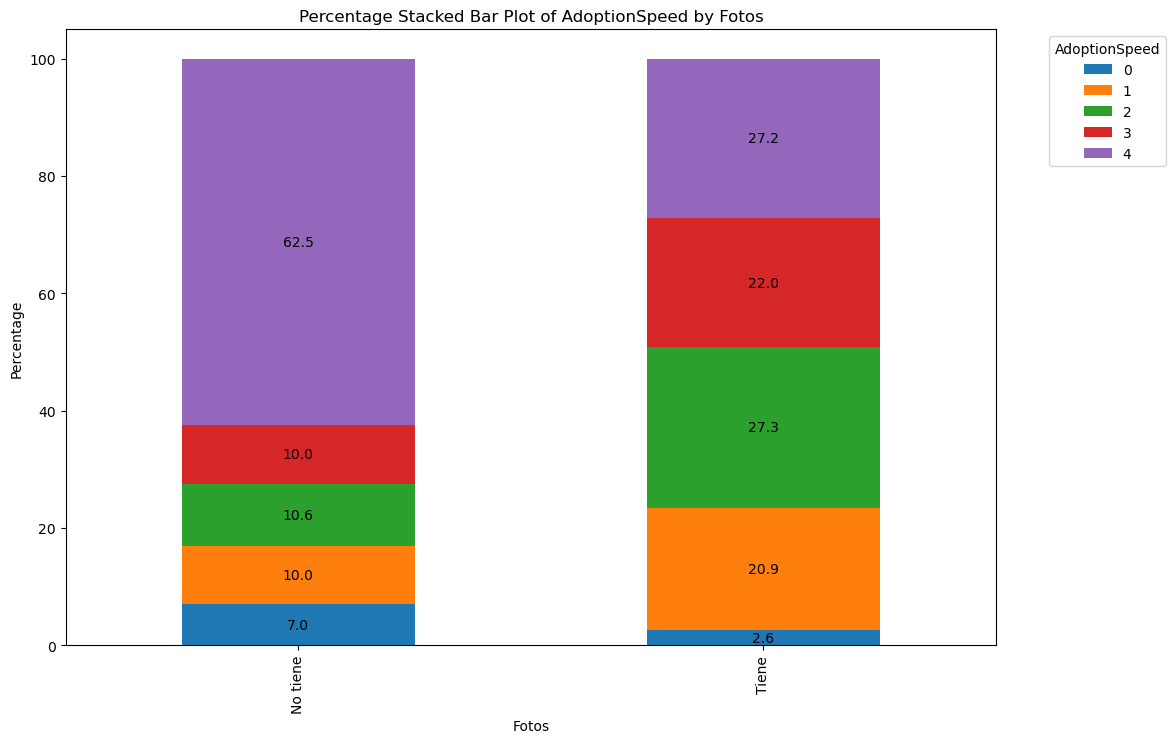

In [40]:
# LLevar a categoricas si pago o no pago
train['Fotos'] = train['PhotoAmt'].apply(lambda x: 'No tiene' if x == 0 else 'Tiene')

# Crear una tabla de conteos
count_data = train.groupby(['Fotos', 'AdoptionSpeed']).size().reset_index(name='count')

# Calcular los porcentajes
total_count = count_data.groupby('Fotos')['count'].transform('sum')
count_data['percentage'] = count_data['count'] / total_count * 100

# Pivotar los datos para el gráfico apilado
pivot_data = count_data.pivot(index='Fotos', columns='AdoptionSpeed', values='percentage')

# Crear el gráfico apilado
ax = pivot_data.plot(kind='bar', stacked=True)

# Agregar etiquetas y título
plt.xlabel('Fotos')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Plot of AdoptionSpeed by Fotos')
plt.legend(title='AdoptionSpeed', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar los porcentajes dentro de las barras
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f')

plt.show()

In [41]:
# Filtrar los datos donde 'AdoptionSpeed' es igual a 1
filtered_data = train[train['Type'] == 2]

# LLevar a categoricas si pago o no pago
train['Fotos'] = train['PhotoAmt'].apply(lambda x: 'No tiene' if x == 0 else 'Tiene')

# Crear una tabla de conteos
count_data = filtered_data.groupby(['Fotos', 'AdoptionSpeed']).size().reset_index(name='count')

# Calcular los porcentajes
total_count = count_data.groupby('Fotos')['count'].transform('sum')
count_data['percentage'] = count_data['count'] / total_count * 100

# Pivotar los datos para el gráfico apilado
pivot_data = count_data.pivot(index='Fotos', columns='AdoptionSpeed', values='percentage')

# Crear el gráfico apilado
ax = pivot_data.plot(kind='bar', stacked=True)

# Agregar etiquetas y título
plt.xlabel('Fotos')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Plot of AdoptionSpeed by Fotos por especie')
plt.legend(title='AdoptionSpeed', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar los porcentajes dentro de las barras
for c in ax.containers:
    ax.bar_label(c, label_type='center', fmt='%.1f')

plt.show()


TypeError: no numeric data to plot

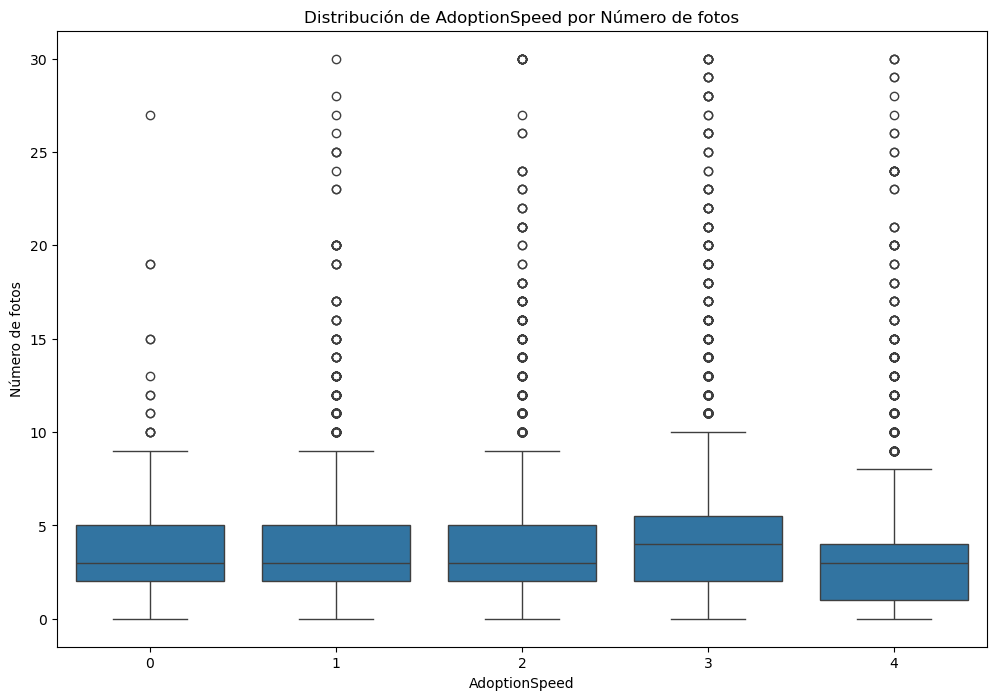

In [42]:
sns.boxplot(data=train, x='AdoptionSpeed', y='PhotoAmt')

# Etiquetas y título
plt.xlabel('AdoptionSpeed')
plt.ylabel('Número de fotos')
plt.title('Distribución de AdoptionSpeed por Número de fotos')

plt.show()

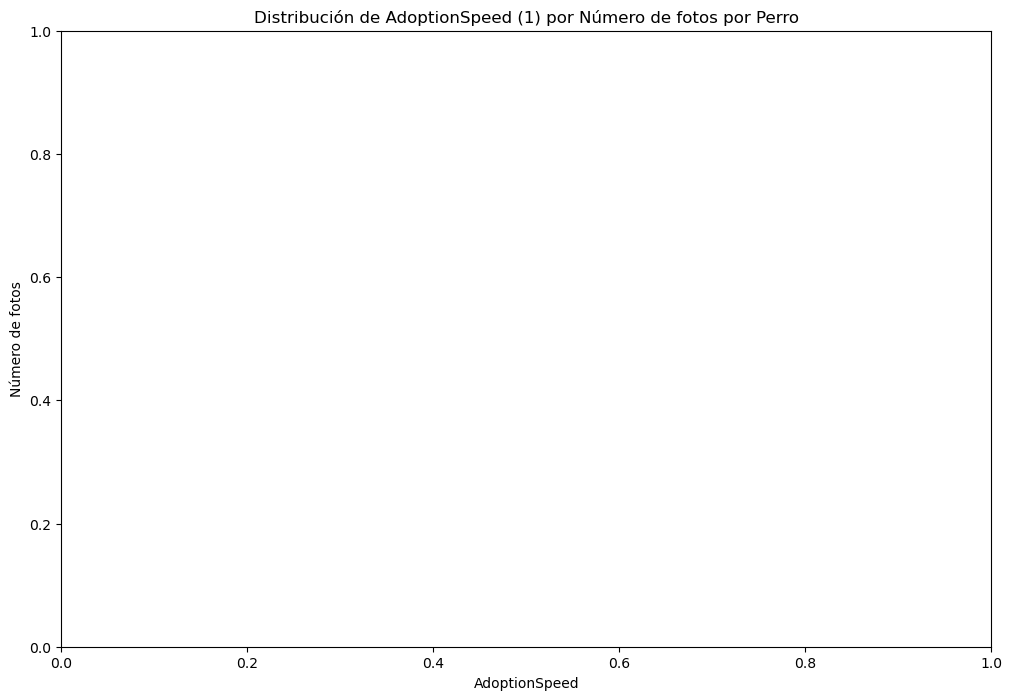

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos donde 'AdoptionSpeed' es igual a 1
filtered_data = train[train['Type'] == 1]

# Crear el boxplot con los datos filtrados
sns.boxplot(data=filtered_data, x='AdoptionSpeed', y='PhotoAmt')

# Etiquetas y título
plt.xlabel('AdoptionSpeed')
plt.ylabel('Número de fotos')
plt.title('Distribución de AdoptionSpeed (1) por Número de fotos por Perro')

# Mostrar el gráfico
plt.show()

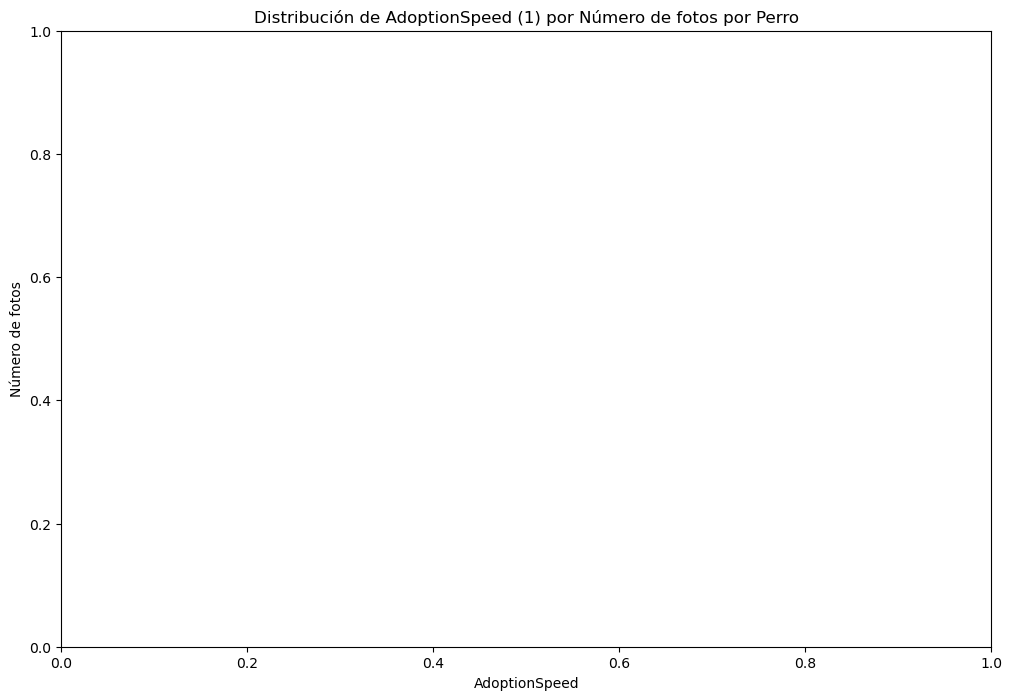

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos donde 'AdoptionSpeed' es igual a 1
filtered_data = train[train['Type'] == 2]

# Crear el boxplot con los datos filtrados
sns.boxplot(data=filtered_data, x='AdoptionSpeed', y='PhotoAmt')

# Etiquetas y título
plt.xlabel('AdoptionSpeed')
plt.ylabel('Número de fotos')
plt.title('Distribución de AdoptionSpeed (1) por Número de fotos por Perro')

# Mostrar el gráfico
plt.show()